In [1]:
options(warns=-1)

In [2]:
data = read.csv('../data/mros_mapping_alpha.txt', sep='\t')

#### check distribution of activation ratio in vitamin D sufficient vs. defficient groups

In [8]:
table(data$VDstatus)


                                   deficiency Missing:Not collected  
                    11                     40                     32 
           sufficiency 
                   515 

In [9]:
sub = data[data$VDstatus %in% c('deficiency', 'sufficiency'), ]
table(sub$VDstatus)


                                   deficiency Missing:Not collected  
                     0                     40                      0 
           sufficiency 
                   515 

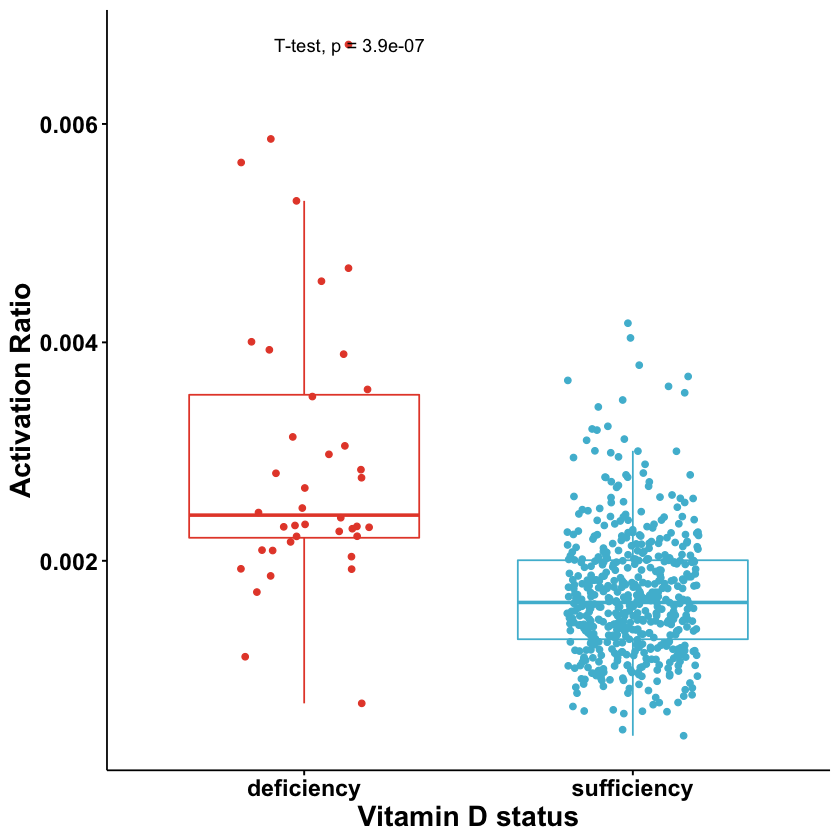

In [10]:
library(ggpubr)
sub = data[data$VDstatus %in% c('deficiency', 'sufficiency'), ]
ggboxplot(sub, x = "VDstatus", y = "ratio_activation", color = "VDstatus", 
          palette = "npg", add = "jitter", outlier.shape = NA) + 
stat_compare_means(method='t.test') +
ylab('Activation Ratio') + xlab('Vitamin D status') + 
theme(axis.text=element_text(size=14, face='bold'), 
       axis.title=element_text(size=17,face="bold"), 
       legend.position="none")
ggsave('../figures/boxplot_act_vdstatus.pdf', width=6, height=5)

### check correlation among Vitamin D measurements 

In [27]:
table = data.frame(cor(cbind(data$OHVD3, data$OHV1D3, data$OHV24D3), method = "pearson", use = "complete.obs"))
colnames(table) = rownames(table) = c('25', '1,25', '24,25')
table

,25,"1,25","24,25"
25,1.0000000,0.4266692,0.7968456
"1,25",0.4266692,1.0000000,0.5742073
"24,25",0.7968456,0.5742073,1.0000000


In [28]:
# correlation strength and p-value between 25 and 1,25
print('25 vs. 1,25')
cor.test(data$OHVD3, data$OHV1D3, method='pearson', use='complete.obs')

[1] "25 vs. 1,25"



	Pearson's product-moment correlation

data:  data$OHVD3 and data$OHV1D3
t = 11.094, df = 553, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3560856 0.4924118
sample estimates:
      cor 
0.4266692 


In [29]:
# correlation strength and p-value between 24,25 and 25
print('25 vs. 24,25')
cor.test(data$OHVD3, data$OHV24D3, method='pearson', use='complete.obs')

[1] "25 vs. 24,25"



	Pearson's product-moment correlation

data:  data$OHVD3 and data$OHV24D3
t = 31.015, df = 553, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7643060 0.8253375
sample estimates:
      cor 
0.7968456 


In [30]:
# correlation strength and p-value between 24,25 and 1,25
print('24 vs. 1,25')
cor.test(data$OHV24D3, data$OHV1D3, method='pearson', use='complete.obs')

[1] "24 vs. 1,25"



	Pearson's product-moment correlation

data:  data$OHV24D3 and data$OHV1D3
t = 16.858, df = 564, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5213043 0.6311555
sample estimates:
      cor 
0.5788502 
